# MAT-Clustering: Clustering Methods for Multiple Aspect Trajectory Data Mining \[MAT-Tools Framework\]

Sample Code in python notebook to use `mat-clustering` as a python library.

The present package offers a tool, to support the user in the task of clustering of multiple aspect trajectories. It integrates into a unique framework for multiple aspects trajectories and in general for multidimensional sequence data mining methods.

Created on Apr, 2024
Copyright (C) 2024, License GPL Version 3 or superior (see LICENSE file)

In [ ]:
!pip install mat-clustering

### 1. Loading Sample Data


In [1]:
from matdata.dataset import load_ds

dataset='mat.FoursquareNYC'

data = load_ds(dataset, missing='-999')
data

Loading dataset file: https://github.com/mat-analysis/datasets/tree/main/mat/FoursquareNYC/


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1055k  100 1055k    0     0  1275k      0 --:--:-- --:--:-- --:--:-- 1279k


,space,time,day,poi,type,root_type,rating,weather,tid,label
0,40.8331652006224 -73.9418603427692,317,Monday,The Lair Of Modern Strange Cowboy,Home (private),Residence,-1.0,Clear,126,6
1,40.8340978041072 -73.9452672225881,1404,Monday,Galaxy Gourmet Deli,Deli / Bodega,Food,8.2,Clouds,126,6
2,40.8331652006224 -73.9418603427692,0,Tuesday,The Lair Of Modern Strange Cowboy,Home (private),Residence,-1.0,Clouds,126,6
3,40.7646959283254 -73.8851974964414,1069,Thursday,Popeyes Louisiana Kitchen,Fried Chicken Joint,Food,6.6,Clear,126,6
4,40.7660790376824 -73.8835287094116,1120,Thursday,MTA Bus Operations Depot - LaGuardia,Bus Station,Travel & Transport,-1.0,Clear,126,6
...,...,...,...,...,...,...,...,...,...,...
66941,40.7047332789043 -73.9877378940582,1037,Friday,Miami Ad School Brooklyn,General College & University,College & University,-1.0,Clouds,29563,1070
66942,40.6951627360199 -73.9954478691072,1210,Friday,Lantern Thai Kitchen,Thai Restaurant,Food,8.0,Clouds,29563,1070
66943,40.6978026652822 -73.9941451630314,481,Saturday,Eastern Athletic Club,Gym,Outdoors & Recreation,6.9,Clouds,29563,1070
66944,40.6946728967503 -73.9940820360805,819,Saturday,Starbucks,Coffee Shop,Food,7.0,Clouds,29563,1070


We select only 5 classes from dataset for this example tutorial: 

In [2]:
from matdata.preprocess import klabels_extract
data = klabels_extract(data, kl=5)

Spliting Data (class-balanced):   0%|          | 0/5 [00:00<?, ?it/s]

Sorting data:   0%|          | 0/5 [00:00<?, ?it/s]

### 2. Similarity-Based Clustering


#### 2.1. Birtch+MUITAS Clustering


In [6]:
from matclustering.methods import TSBirch

# We use number of clusters as k=5, as we assume the 5 labels will be the clusters.
model = TSBirch(k=5) 

model.prepare_input(data)
#model.train()
model.test()


[TSBirch:] Building model


Converting Trajectories:   0%|          | 0/84 [00:00<?, ?it/s]


[TSBirch:] Default metric set to MUITAS.
Feature: Attributes: [0], Weight: 1
Feature: Attributes: [1], Weight: 1
Feature: Attributes: [2], Weight: 1
Feature: Attributes: [3], Weight: 1
Feature: Attributes: [4], Weight: 1
Feature: Attributes: [5], Weight: 1
Feature: Attributes: [6], Weight: 1
Feature: Attributes: [7], Weight: 1


Computing similarity matrix:   0%|          | 0/83 [00:00<?, ?it/s]

[TSBirch:] Creating a model to test set


Model Testing:   0%|          | 0/1 [00:00<?, ?it/s]

[TSBirch:] Processing time: 18488.084 milliseconds. Done.


(   rand_index  adusted_rand_index  mutual_info  adusted_mutual_info  \
 0    0.917384            0.764747     1.262444             0.830818   
 
    norm_mutual_info  fm_index  v_measure  completeness  homogeneity  \
 0          0.842544  0.820334   0.842544      0.881483     0.806899   
 
    silhouette  db_index  ch_index  random_state    runtime  
 0    0.267276  1.344771  20.93315             1  18450.434  ,
 array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3,
        1, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [7]:
model.summary()

,rand_index,adusted_rand_index,mutual_info,adusted_mutual_info,norm_mutual_info,fm_index,v_measure,completeness,homogeneity,silhouette,db_index,ch_index,random_state,runtime
0,0.917384,0.764747,1.262444,0.830818,0.842544,0.820334,0.842544,0.881483,0.806899,0.267276,1.344771,20.93315,1.0,18450.434


In [8]:
from matclustering.methods import TSBirch

# We can test parameters as list to try find the best model:
model = TSBirch(k = [2, 5, 8]) 

model.prepare_input(data)
model.train() # Call train to experiment the different parameters
model.test() # Call test to run the best model by the adusted_rand_index


[TSBirch:] Building model


Converting Trajectories:   0%|          | 0/84 [00:00<?, ?it/s]


[TSBirch:] Default metric set to MUITAS.
Feature: Attributes: [0], Weight: 1
Feature: Attributes: [1], Weight: 1
Feature: Attributes: [2], Weight: 1
Feature: Attributes: [3], Weight: 1
Feature: Attributes: [4], Weight: 1
Feature: Attributes: [5], Weight: 1
Feature: Attributes: [6], Weight: 1
Feature: Attributes: [7], Weight: 1


Computing similarity matrix:   0%|          | 0/83 [00:00<?, ?it/s]

[TSBirch:] Training model


[TSBirch:] Model Training:   0%|          | 0/3 [00:00<?, ?it/s]

[TSBirch:] Creating a model to test set


Model Testing:   0%|          | 0/1 [00:00<?, ?it/s]

[TSBirch:] Processing time: 81.336 milliseconds. Done.


(   rand_index  adusted_rand_index  mutual_info  adusted_mutual_info  \
 0    0.963855            0.883798     1.524502             0.898436   
 
    norm_mutual_info  fm_index  v_measure  completeness  homogeneity  \
 0          0.909084  0.909267   0.909084      0.851978     0.974395   
 
    silhouette  db_index   ch_index  random_state  runtime  
 0    0.278595   1.33091  17.676677             1   75.362  ,
 array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3,
        0, 3, 2, 2, 2, 2, 2, 2, 7, 2, 2, 2, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 6, 6, 0, 6, 6, 6, 6, 6, 6, 6, 6, 0, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

In [9]:
# The training report:
model.report

,rand_index,adusted_rand_index,mutual_info,adusted_mutual_info,norm_mutual_info,fm_index,v_measure,completeness,homogeneity,silhouette,db_index,ch_index,p0
2,0.963855,0.883798,1.524502,0.898436,0.909084,0.909267,0.909084,0.851978,0.974395,0.278595,1.330910,17.676677,8
1,0.917384,0.764747,1.262444,0.830818,0.842544,0.820334,0.842544,0.881483,0.806899,0.267276,1.344771,20.933150,5
0,0.711991,0.421661,0.690594,0.603724,0.612458,0.648065,0.612458,1.000000,0.441398,0.165395,2.236949,16.147343,2


In [10]:
# Test evaluation results
model.test_report

,rand_index,adusted_rand_index,mutual_info,adusted_mutual_info,norm_mutual_info,fm_index,v_measure,completeness,homogeneity,silhouette,db_index,ch_index,random_state,runtime
0,0.963855,0.883798,1.524502,0.898436,0.909084,0.909267,0.909084,0.851978,0.974395,0.278595,1.33091,17.676677,1,75.362


In [11]:
# Mean results:
model.summary()

,rand_index,adusted_rand_index,mutual_info,adusted_mutual_info,norm_mutual_info,fm_index,v_measure,completeness,homogeneity,silhouette,db_index,ch_index,random_state,runtime
0,0.963855,0.883798,1.524502,0.898436,0.909084,0.909267,0.909084,0.851978,0.974395,0.278595,1.33091,17.676677,1.0,75.362


#### 2.2. DBSCAN+MUITAS Clustering


In [9]:
from matclustering.methods import TSDBSCAN

samples = int(len(data.tid.unique())/5)-1

model = TSDBSCAN(min_samples=2) 

model.prepare_input(data)
model.train()
model.test()


[TSDBSCAN:] Building model


Converting Trajectories:   0%|          | 0/84 [00:00<?, ?it/s]


[TSDBSCAN:] Default metric set to MUITAS.
Feature: Attributes: [0], Weight: 1
Feature: Attributes: [1], Weight: 1
Feature: Attributes: [2], Weight: 1
Feature: Attributes: [3], Weight: 1
Feature: Attributes: [4], Weight: 1
Feature: Attributes: [5], Weight: 1
Feature: Attributes: [6], Weight: 1
Feature: Attributes: [7], Weight: 1
[TSDBSCAN:] Training model


[TSDBSCAN:] Model Training:   0%|          | 0/1 [00:00<?, ?it/s]

[TSDBSCAN:] Creating a model to test set


Model Testing:   0%|          | 0/1 [00:00<?, ?it/s]

[TSDBSCAN:] Processing time: 39.352 milliseconds. Done.


(   rand_index  adusted_rand_index  mutual_info  adusted_mutual_info  \
 0      0.3144            0.018677      0.14603             0.077324   
 
    norm_mutual_info  fm_index  v_measure  completeness  homogeneity  \
 0          0.150444  0.434324   0.150444      0.387601     0.093336   
 
    silhouette  db_index  ch_index  random_state  runtime  
 0   -0.088371  1.146518   3.19763             1   38.217  ,
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,
        -1, -1, -1, -1, -1,  2,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1]))

In [10]:
model.summary()

,rand_index,adusted_rand_index,mutual_info,adusted_mutual_info,norm_mutual_info,fm_index,v_measure,completeness,homogeneity,silhouette,db_index,ch_index,random_state,runtime
0,0.3144,0.018677,0.14603,0.077324,0.150444,0.434324,0.150444,0.387601,0.093336,-0.088371,1.146518,3.19763,1.0,38.217


#### 2.3. SpectralClustering+MUITAS 


In [11]:
from matclustering.methods import TSpectral

model = TSpectral(k=5) # Since 5 labels

model.prepare_input(data)
model.train()
model.test()


[TSpectral:] Building model


Converting Trajectories:   0%|          | 0/84 [00:00<?, ?it/s]


[TSpectral:] Default metric set to MUITAS.
Feature: Attributes: [0], Weight: 1
Feature: Attributes: [1], Weight: 1
Feature: Attributes: [2], Weight: 1
Feature: Attributes: [3], Weight: 1
Feature: Attributes: [4], Weight: 1
Feature: Attributes: [5], Weight: 1
Feature: Attributes: [6], Weight: 1
Feature: Attributes: [7], Weight: 1
[TSpectral:] Training model


[TSpectral:] Model Training:   0%|          | 0/1 [00:00<?, ?it/s]

[TSpectral:] Creating a model to test set


/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/cluster/_spectral.py:658: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(


Model Testing:   0%|          | 0/1 [00:00<?, ?it/s]

[TSpectral:] Processing time: 45.126 milliseconds. Done.


/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/sklearn/cluster/_spectral.py:658: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(


(   rand_index  adusted_rand_index  mutual_info  adusted_mutual_info  \
 0    0.942628            0.822975     1.336201             0.836083   
 
    norm_mutual_info  fm_index  v_measure  completeness  homogeneity  \
 0          0.847225  0.859233   0.847225      0.840517     0.854042   
 
    silhouette  db_index   ch_index  random_state  runtime  
 0    0.300868  1.431809  26.485319             1   43.926  ,
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 4, 0, 0,
        4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4]))

In [12]:
model.summary()

,rand_index,adusted_rand_index,mutual_info,adusted_mutual_info,norm_mutual_info,fm_index,v_measure,completeness,homogeneity,silhouette,db_index,ch_index,random_state,runtime
0,0.942628,0.822975,1.336201,0.836083,0.847225,0.859233,0.847225,0.840517,0.854042,0.300868,1.431809,26.485319,1.0,43.926


#### 2.4. KMeans+MUITAS Clustering


In [13]:
from matclustering.methods import TSKMeans

model = TSKMeans(k=[2,5,8]) # Since 5 labels

model.prepare_input(data)
model.train()
model.test()


[TSKMeans:] Building model


Converting Trajectories:   0%|          | 0/84 [00:00<?, ?it/s]


[TSKMeans:] Default metric set to MUITAS.
Feature: Attributes: [0], Weight: 1
Feature: Attributes: [1], Weight: 1
Feature: Attributes: [2], Weight: 1
Feature: Attributes: [3], Weight: 1
Feature: Attributes: [4], Weight: 1
Feature: Attributes: [5], Weight: 1
Feature: Attributes: [6], Weight: 1
Feature: Attributes: [7], Weight: 1
[TSKMeans:] Training model


[TSKMeans:] Model Training:   0%|          | 0/3 [00:00<?, ?it/s]

[TSKMeans:] Creating a model to test set


Model Testing:   0%|          | 0/1 [00:00<?, ?it/s]

[TSKMeans:] Processing time: 76.154 milliseconds. Done.


(   rand_index  adusted_rand_index  mutual_info  adusted_mutual_info  \
 0    0.953528            0.857492     1.363634             0.857064   
 
    norm_mutual_info  fm_index  v_measure  completeness  homogeneity  \
 0          0.866823  0.886838   0.866823      0.862122     0.871576   
 
    silhouette  db_index   ch_index  random_state  runtime  
 0    0.302521  1.408768  26.656144             1   75.004  ,
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1], dtype=int32))

In [14]:
model.summary()

,rand_index,adusted_rand_index,mutual_info,adusted_mutual_info,norm_mutual_info,fm_index,v_measure,completeness,homogeneity,silhouette,db_index,ch_index,random_state,runtime
0,0.953528,0.857492,1.363634,0.857064,0.866823,0.886838,0.866823,0.862122,0.871576,0.302521,1.408768,26.656144,1.0,75.004


#### 2.5. KMedoids+PairWise Clustering


In [15]:
#!pip install trajminer
from matclustering.methods import TSKMedoids

# We use number of clusters as k=5, as we assume the 5 labels will be the clusters.
model = TSKMedoids(k=5, init='park') 

model.prepare_input(data)
model.train()
model.test()


[TSKMedoids:] Building model


Converting Trajectories:   0%|          | 0/84 [00:00<?, ?it/s]


[TSKMedoids:] Default metric set to MUITAS.
Feature: Attributes: [0], Weight: 1
Feature: Attributes: [1], Weight: 1
Feature: Attributes: [2], Weight: 1
Feature: Attributes: [3], Weight: 1
Feature: Attributes: [4], Weight: 1
Feature: Attributes: [5], Weight: 1
Feature: Attributes: [6], Weight: 1
Feature: Attributes: [7], Weight: 1
[TSKMedoids:] Training model


[TSKMedoids:] Model Training:   0%|          | 0/1 [00:00<?, ?it/s]

[TSKMedoids:] Creating a model to test set


Model Testing:   0%|          | 0/1 [00:00<?, ?it/s]

[TSKMedoids:] Processing time: 61.092 milliseconds. Done.


(   rand_index  adusted_rand_index  mutual_info  adusted_mutual_info  \
 0    0.752151            0.243836     0.583763             0.325872   
 
    norm_mutual_info  fm_index  v_measure  completeness  homogeneity  \
 0          0.372117  0.400019   0.372117      0.371124     0.373116   
 
    silhouette  db_index  ch_index  random_state  runtime  
 0    0.044509  3.383495  5.985744             1   59.892  ,
 array([1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 4, 2, 2, 3, 4, 3, 3, 4, 3, 4,
        3, 4, 1, 1, 1, 1, 1, 1, 5, 3, 4, 1, 4, 3, 3, 2, 3, 3, 2, 4, 3, 2,
        2, 3, 2, 1, 3, 2, 1, 1, 1, 2, 3, 1, 3, 1, 3, 1, 1, 3, 3, 3, 1, 4,
        4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]))

In [16]:
model.summary()

,rand_index,adusted_rand_index,mutual_info,adusted_mutual_info,norm_mutual_info,fm_index,v_measure,completeness,homogeneity,silhouette,db_index,ch_index,random_state,runtime
0,0.752151,0.243836,0.583763,0.325872,0.372117,0.400019,0.372117,0.371124,0.373116,0.044509,3.383495,5.985744,1.0,59.892


### 3. Hierarchical Clustering (#TODO)

#### 3.1 MAT-Tree Clustering


In [3]:
from matclustering.methods import MATTree

# We use number of clusters as k=5, as we assume the 5 labels will be the clusters.
model = MATTree(exclude_aspects=['weather']) 

X = model.prepare_input(data)

model.fit(X)
#model.train()
#model.test()


[MATTree:] Building model
Computing frequency matrix...DONE!
Computing absolute freq matrix...DONE
Computing aspects threshold...DONE!
Starting trajectory split on branches (split method: binary). It will do:
	Check trajs for left and right branches regarding the AVG.
	Compute variance for each aspect and branch.
	Running...

Processing Lvl 0:   0%|          | 0/1889 [00:00<?, ?it/s]

/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3715: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/tarlisportela/miniforge3/lib/python3.9/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ALL DONE!
Computing frequency matrix...DONE!
Computing absolute freq matrix...DONE
Stop criteria matched.
Computing frequency matrix...DONE!
Computing absolute freq matrix...DONE
Stop criteria matched.


(   rand_index  adusted_rand_index  mutual_info  adusted_mutual_info  \
 0     0.51004            0.013482     0.039333             0.013126   
 
    norm_mutual_info  fm_index  v_measure  completeness  homogeneity  
 0          0.034848  0.331485   0.034848      0.056769      0.02514  ,
 array([0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
        0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0]))

In [4]:
model.summary()

,rand_index,adusted_rand_index,mutual_info,adusted_mutual_info,norm_mutual_info,fm_index,v_measure,completeness,homogeneity
0,0.51004,0.013482,0.039333,0.013126,0.034848,0.331485,0.034848,0.056769,0.02514


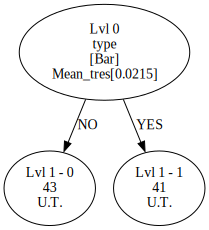

In [5]:
model.digraph()

### 4. Co-Clustering (#TODO)

#
---

\# By Tarlis Portela (2023)